In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [ ]:
# dadt = -a + alpha/(1+C^n)
# dbdt = -b + alpha(1+A^n)
# dcdt = -c + alpha/(1+B^n) + kSi/(1+Si)
# dAdt = -beta(a-A)
# dBdt = -beta(b-B)
# dCdt = -beta(c-C)
# dSidt = -k0*Si + k1*A - eta(Si-Se)
# dSedt = ke*Se + kdiff(S - Se)

In [24]:
def repressilator(state, t):
    
    a, b, c, A, B, C, Si = state
    
    # mRNA
    dadt = -a + alpha/(1+C**n)
    dbdt = -b + alpha/(1+A**n)
    dcdt = -c + alpha/(1+B**n) + kappa*Si/(1+Si)
    
    # protein
    dAdt = -beta*(a-A)
    dBdt = -beta*(b-B)
    dCdt = -beta*(c-C)
    
    # autoinducer
    dSidt = -k0*Si + k1*A - eta*(Si-Se) # internal concentration
    
    return dadt, dbdt, dcdt, dAdt, dBdt, dCdt, dSidt

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2922486542343D+02   r2 =  0.6067256603339D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2922486542343D+02   r2 =  0.6067256603339D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2922486542343D+02   r2 =  0.6067256603339D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2922486542343D+02   r2 =  0.1213451320668D-14
 lsoda--  warning..internal t (=r1) 

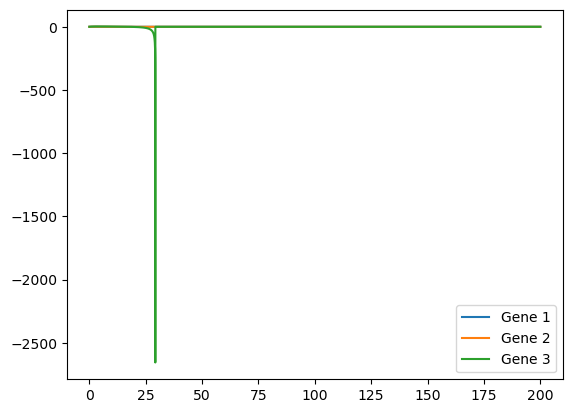

In [27]:
alpha = 1
beta = 0.2
kappa = 20
eta = 10
k0 = 1
k1 = 0.1
ke = 1/6
kd = 1
n = 2
Se = 0.1

state0 = [0.2, 0.1, 0.3, 0.1, 0.4, 0.5, 0.1]
t = np.linspace(0, 200, 10000)

state = odeint(repressilator, state0, t)

plt.plot(t, state[:,0])
plt.plot(t, state[:,1])
plt.plot(t, state[:,2])
plt.legend(('Gene 1', 'Gene 2', 'Gene 3'))